In [2]:
import pandas as pd
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


Intro:
For our project, we decided to use 3 main metrics in determining which neighborhood is the best. The metrics we decided on are Crime rate, How often the bus comes on time, and smell.
The Metric: For our final metric, we decided to weight all 3 of the metrics contained in our datasets as Percentages. For Bus timeliness, we decided to use the metric of how often the bus is on time. 
The Best Neighborhood:
When we average out these values, the neighborhoods with the highest value end up being: *Insert Data Here*

Conclusion:
This section is individual

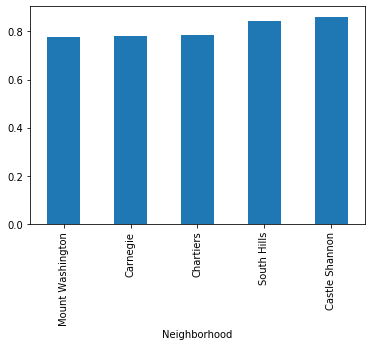

In [14]:
pgh_bus_data = pd.read_csv("https://data.wprdc.org/datastore/dump/00eb9600-69b5-4f11-b20a-8c8ddd8cfe7a",
                           index_col="route", 
                           parse_dates=True)
pgh_bus_data.groupby('route_full_name')['on_time_percent'].mean().sort_values().to_csv('meanOTPbyRoute.csv', header='False') #Writes the Mean OTP per route to a csv file
#Labeled bus routes by neighborhood manually. #Some of these are approximations, since bus routes have a lot of stops.
pgh_bus_data = pd.read_csv("manuallySorted.csv", index_col="Neighborhood")
pgh_bus_data.groupby('Neighborhood')['on_time_percent'].mean().sort_values().to_csv('meanOTPbyNeighborhood.csv', header='False') #We find the mean again because some neighborhoods have multiple routes
pgh_bus_data.groupby('Neighborhood')['on_time_percent'].mean().sort_values().tail().plot.bar()

This graph is of the 5 neighborhoods where the busses are on time most often.

The code below reads in the dataset "arrests.csv" and assigns it to a varriable called crime, displaying the first 5 lines. This dataset is a collection of various arrests made by the City of Pittsburgh Police Department over many years. Each arrest has detailed information about the person arrested as well as the location and the location of the incident. I decided that incident location, more specifically incident neighborhood, was a better statistic than arrest location to assess the level of crime in the area. Arrests are usually only for more severe crimes than noise complaints or other minor offenses, so by sorting the neighborhoods by the number of arrests from incidents within them, a good picture of that neighborhood's safety can be drawn.

In [4]:

crime = pd.read_csv("arrests.csv",index_col="PK")
crime.head()

,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
PK,,,,,,,,,,,,,,,
1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [5]:
(crime['INCIDENTNEIGHBORHOOD'].value_counts()/2203-1)*(-1)

South Side Flats             0.899682
Central Business District    0.931457
East Allegheny               0.931911
Carrick                      0.947345
East Liberty                 0.950068
                               ...   
Outside State                0.999092
New Homestead                0.999546
Hays                         0.999546
Chartiers City               0.999546
Swisshelm Park               0.999546
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: float64

In [6]:
crime['INCIDENTNEIGHBORHOOD'].value_counts()

South Side Flats             221
Central Business District    151
East Allegheny               150
Carrick                      116
East Liberty                 110
                            ... 
Outside State                  2
New Homestead                  1
Hays                           1
Chartiers City                 1
Swisshelm Park                 1
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64

The following code snippet creates the actual metric we used. By getting the value counts for unique entries into 'INCIDENTNEIGHBORHOOD', we get the number of arrests in each neighborhood. From there we can divide by the highest count to create a metric that is between 0 and 1. Since we want 1 to be the best score and 0 the worst, we just subtract the metric by 1 and invert the sign to get the final values.

In [24]:
crime_metric = (crime['INCIDENTNEIGHBORHOOD'].value_counts()/2203-1)*(-1)
crime_metric.to_csv('crimeMetric.csv', header='False')
#manually renamed 'Incident Neighborhood' to 'Neighborhood'

In [18]:
print(crime_metric['Carrick'])

0.9473445301861099


In [21]:
def barGraph(df):
    ob = df['INCIDENTNEIGHBORHOOD'].value_counts()
barGraph(crime)

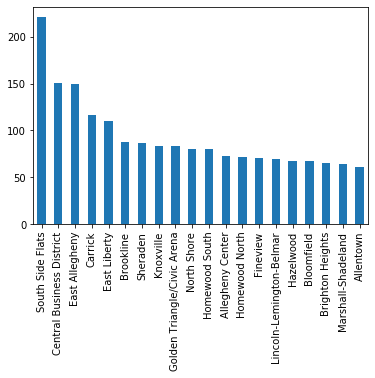

In [22]:
crime['INCIDENTNEIGHBORHOOD'].value_counts().head(20).plot(kind="bar")
# most dangerous neighborhoods (by number of arrests)

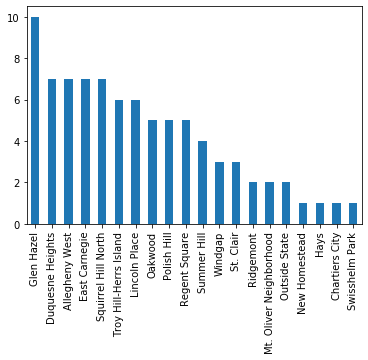

In [23]:
crime['INCIDENTNEIGHBORHOOD'].value_counts().tail(20).plot(kind="bar")
# safest neighborhoods (by number of arrests)

Section on the third metric
Section on Air Quality

The Best Neighborhood:
When we average out these values, the neighborhoods with the highest value end up being: *Insert Data Here*
